## Breast Cancer Detection Model with Machine Learning

### Summary
1. Problem understanding
2. Load dataset
3. Data exploration
4. Data pre-processing  
    4.1 Missing value treatment  
    4.2 Train and Test data split
5. Classification Models
6. Model Result
7. Conclusion
8. References

### 1. Problem understanding
- In this project, a machine learning model was created to classify the prognosis of a breast cancer (malignant or benign) based on features computed from digitized images of of a fine needle aspirate (FNA) of a breast mass. This features describe characteristics of the cell nuclei present in the images.  

- Some asks could be answered in the present analysis:
>   1. Which features are more influential in prognosis?
>   2. Which machine learning model presents the highest accuracy in determining prognosis?
>   3. What is the value of this accuracy?  

- The data set used is **Breast Cancer Wisconsin (Diagnostic) Data Set** from Scikit-Learn, originally found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29.  

- This dataset contains 569 instances and 30 attributes.  

- Attribute Information:
    * radius (mean of distances from center to points on the perimeter)
    * texture (standard deviation of gray-scale values)
    * perimeter
    * area
    * smoothness (local variation in radius lengths)
    * compactness (perimeter^2 / area - 1.0)
    * concavity (severity of concave portions of the contour)
    * concave points (number of concave portions of the contour)
    * symmetry
    * fractal dimension (“coastline approximation” - 1)
    The mean, standard error, and “worst” or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features.

In [1]:
# Ignore warnings:
import warnings
warnings.filterwarnings("ignore")

### 2. Load dataset

In [2]:
# Import modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # for missing values analysis
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# Dataset loading:
data_load = load_breast_cancer()

In [4]:
# Creating a data frame with load data:
df = pd.DataFrame(data_load.data, columns = data_load.feature_names)

In [5]:
# Including diagnosis column on data frame:
# 0 - malignant
# 1 - benign
df['prognosis'] = data_load.target

In [6]:
# Show first five rows:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,prognosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 3. Data exploration

In [7]:
# Showing dataset size:
df.shape

(569, 31)

In [8]:
# Showing dataset main information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# Dataset statistical summary:
df.describe().style.background_gradient()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,prognosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
# Setting charts style:
sns.set_style("darkgrid")

In [11]:
# Checking class distribution:
# 0 - malignant
# 1 - benign

df_classes = pd.DataFrame(df.groupby('prognosis').size(), columns=['number of ocurrences'])
df_classes['prognosis'] = df_classes.index
df_classes.style.set_caption("Class Distribution").hide_index()

number of ocurrences,prognosis
212,0
357,1


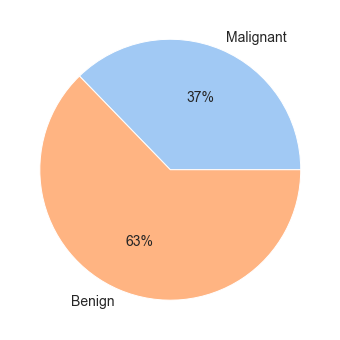

In [12]:
# Creating pie chart to show class distribution:
colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(12, 6))

plt.pie(df.groupby('prognosis').size(), labels = ['Malignant','Benign'], colors = colors, autopct='%.0f%%', textprops={'fontsize': 14})
plt.show()

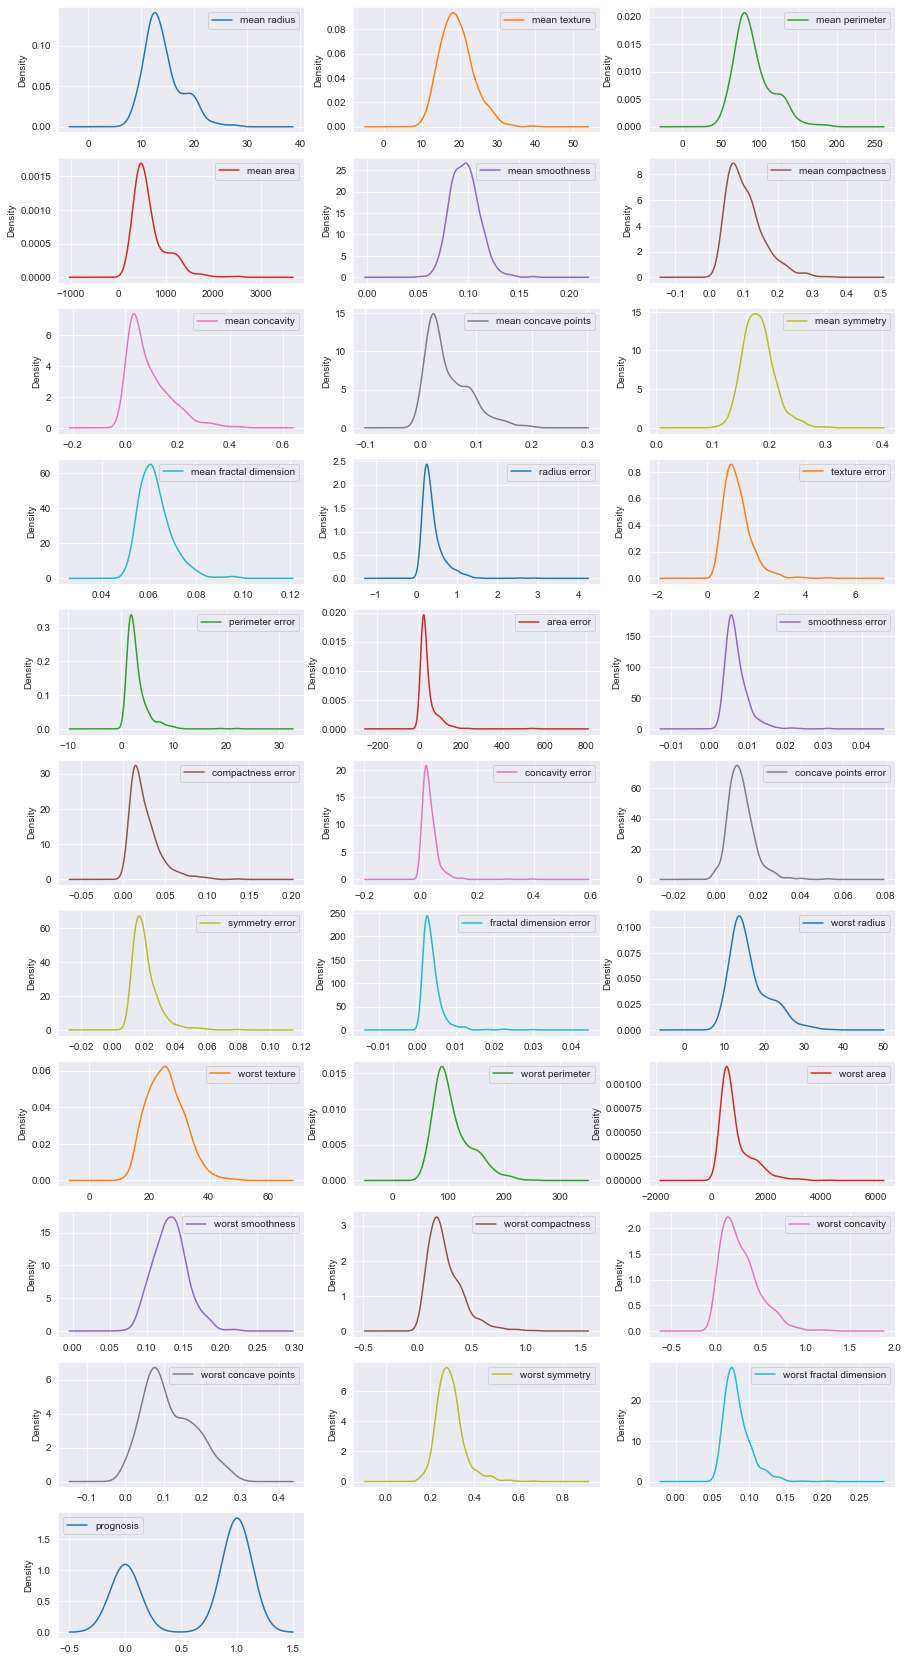

In [13]:
# Chart to verify dataset feature distribution - Density plot:
df.plot(kind='density', subplots=True, layout=(11,3), sharex=False, figsize=(15,30))
plt.show()

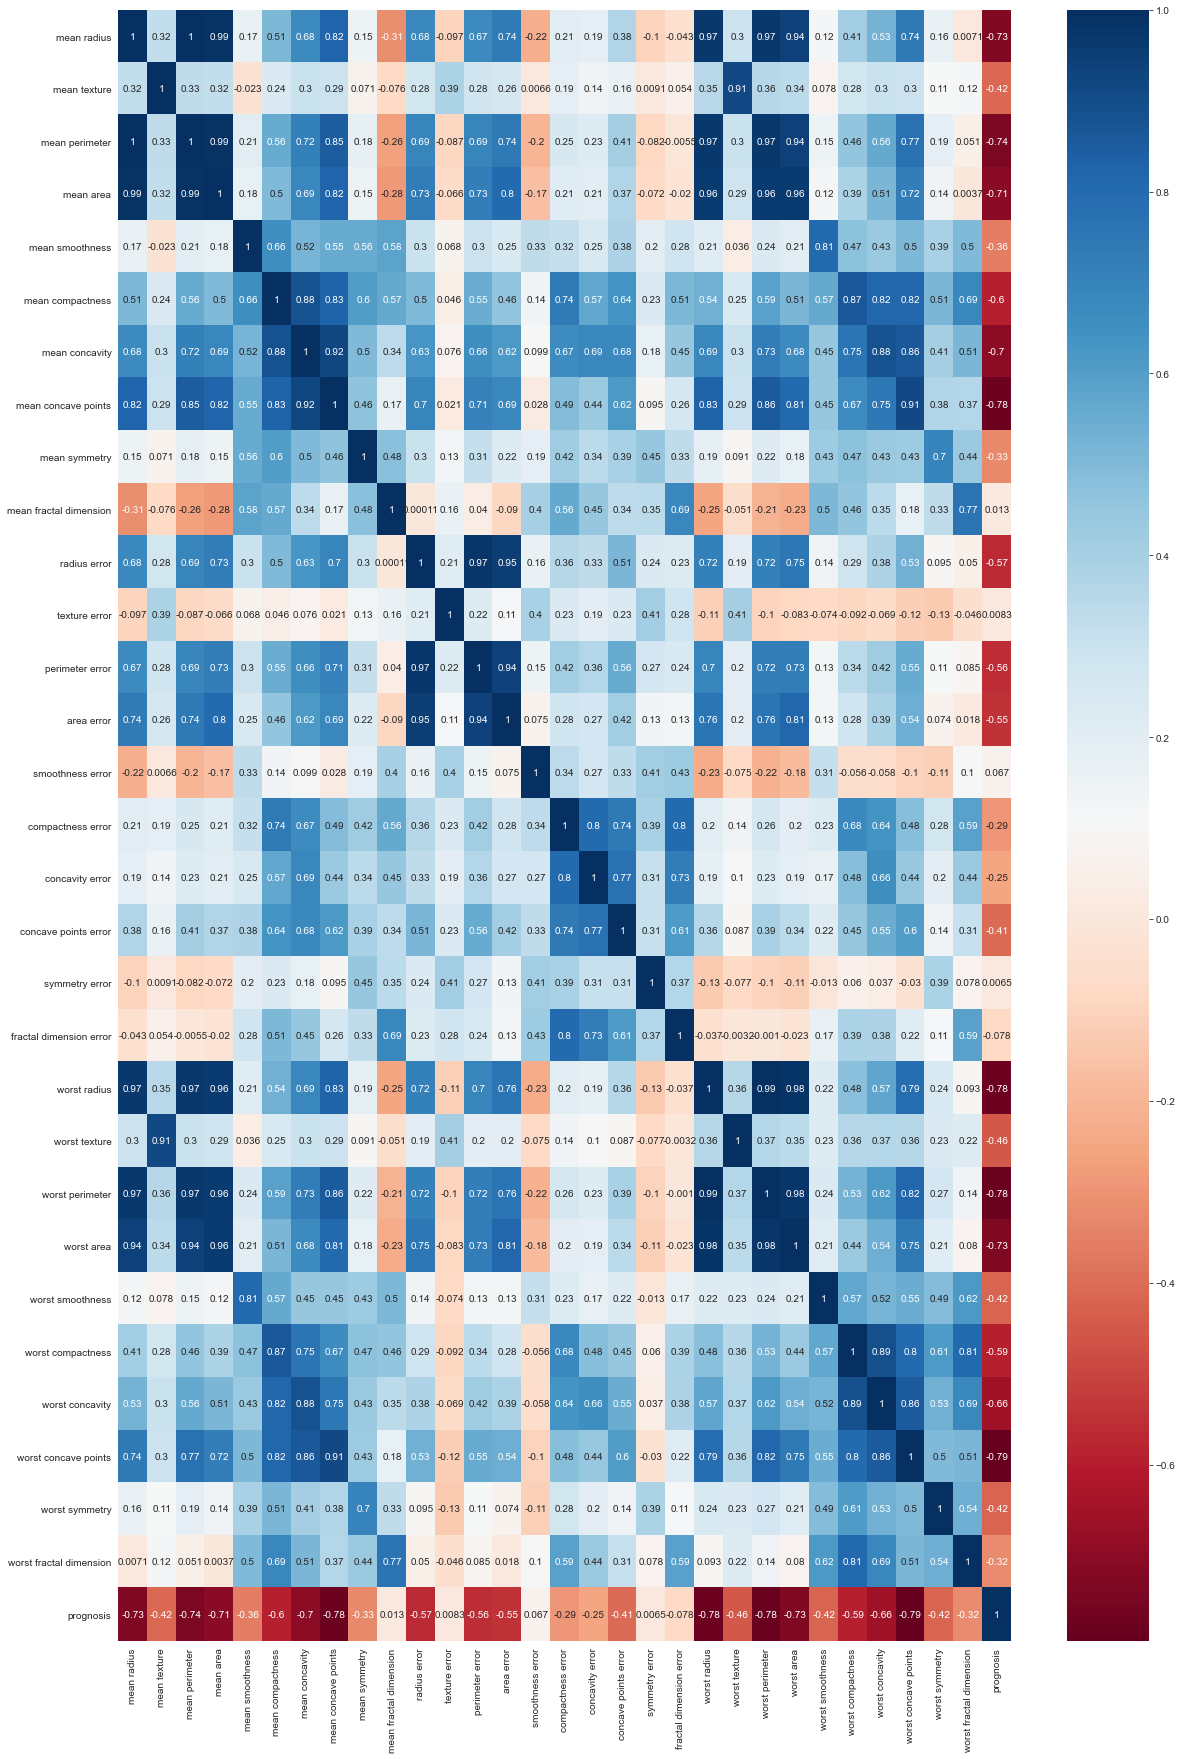

In [14]:
# Verifying Correlation Matrix:
fig, ax = plt.subplots(figsize=(20,30))
sns.heatmap(df.corr(), annot=True, cmap='RdBu');

There are many features in dataset, so let's check which features are most influential using a method called **Recursive Feature Elimination (RFE)**.

In [15]:
# Train and Test data split:
array = df.values
X = array[:,0:30].astype(float) # all columns except class (prognosis)
Y = array[:,30] # only class column (prognosis)
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=test_size, random_state=seed)

# Model creating:
modelo_rfe = LogisticRegression(max_iter=200)

# Recursive feature elimination:
rfe = RFE(modelo_rfe, 10) # Setting ten features to select.
fit = rfe.fit(X_train, Y_train)

# Show results:
df_rfe_results = pd.DataFrame(list(zip(fit.support_, fit.ranking_)), index=df.columns[0:30], columns=['Selected feature','Rank'])
df_rfe_results.style.highlight_min(color='DarkCyan',subset='Rank')

,Selected feature,Rank
mean radius,True,1
mean texture,False,8
mean perimeter,False,15
mean area,False,20
mean smoothness,False,6
mean compactness,True,1
mean concavity,True,1
mean concave points,False,2
mean symmetry,False,3
mean fractal dimension,False,13


In fact, the ten first features most influential are: **mean radius, worst smoothness, worst concave points, worst concavity, worst compactness, mean compactness, mean concavity, worst symmetry, worst radius and texture error.**

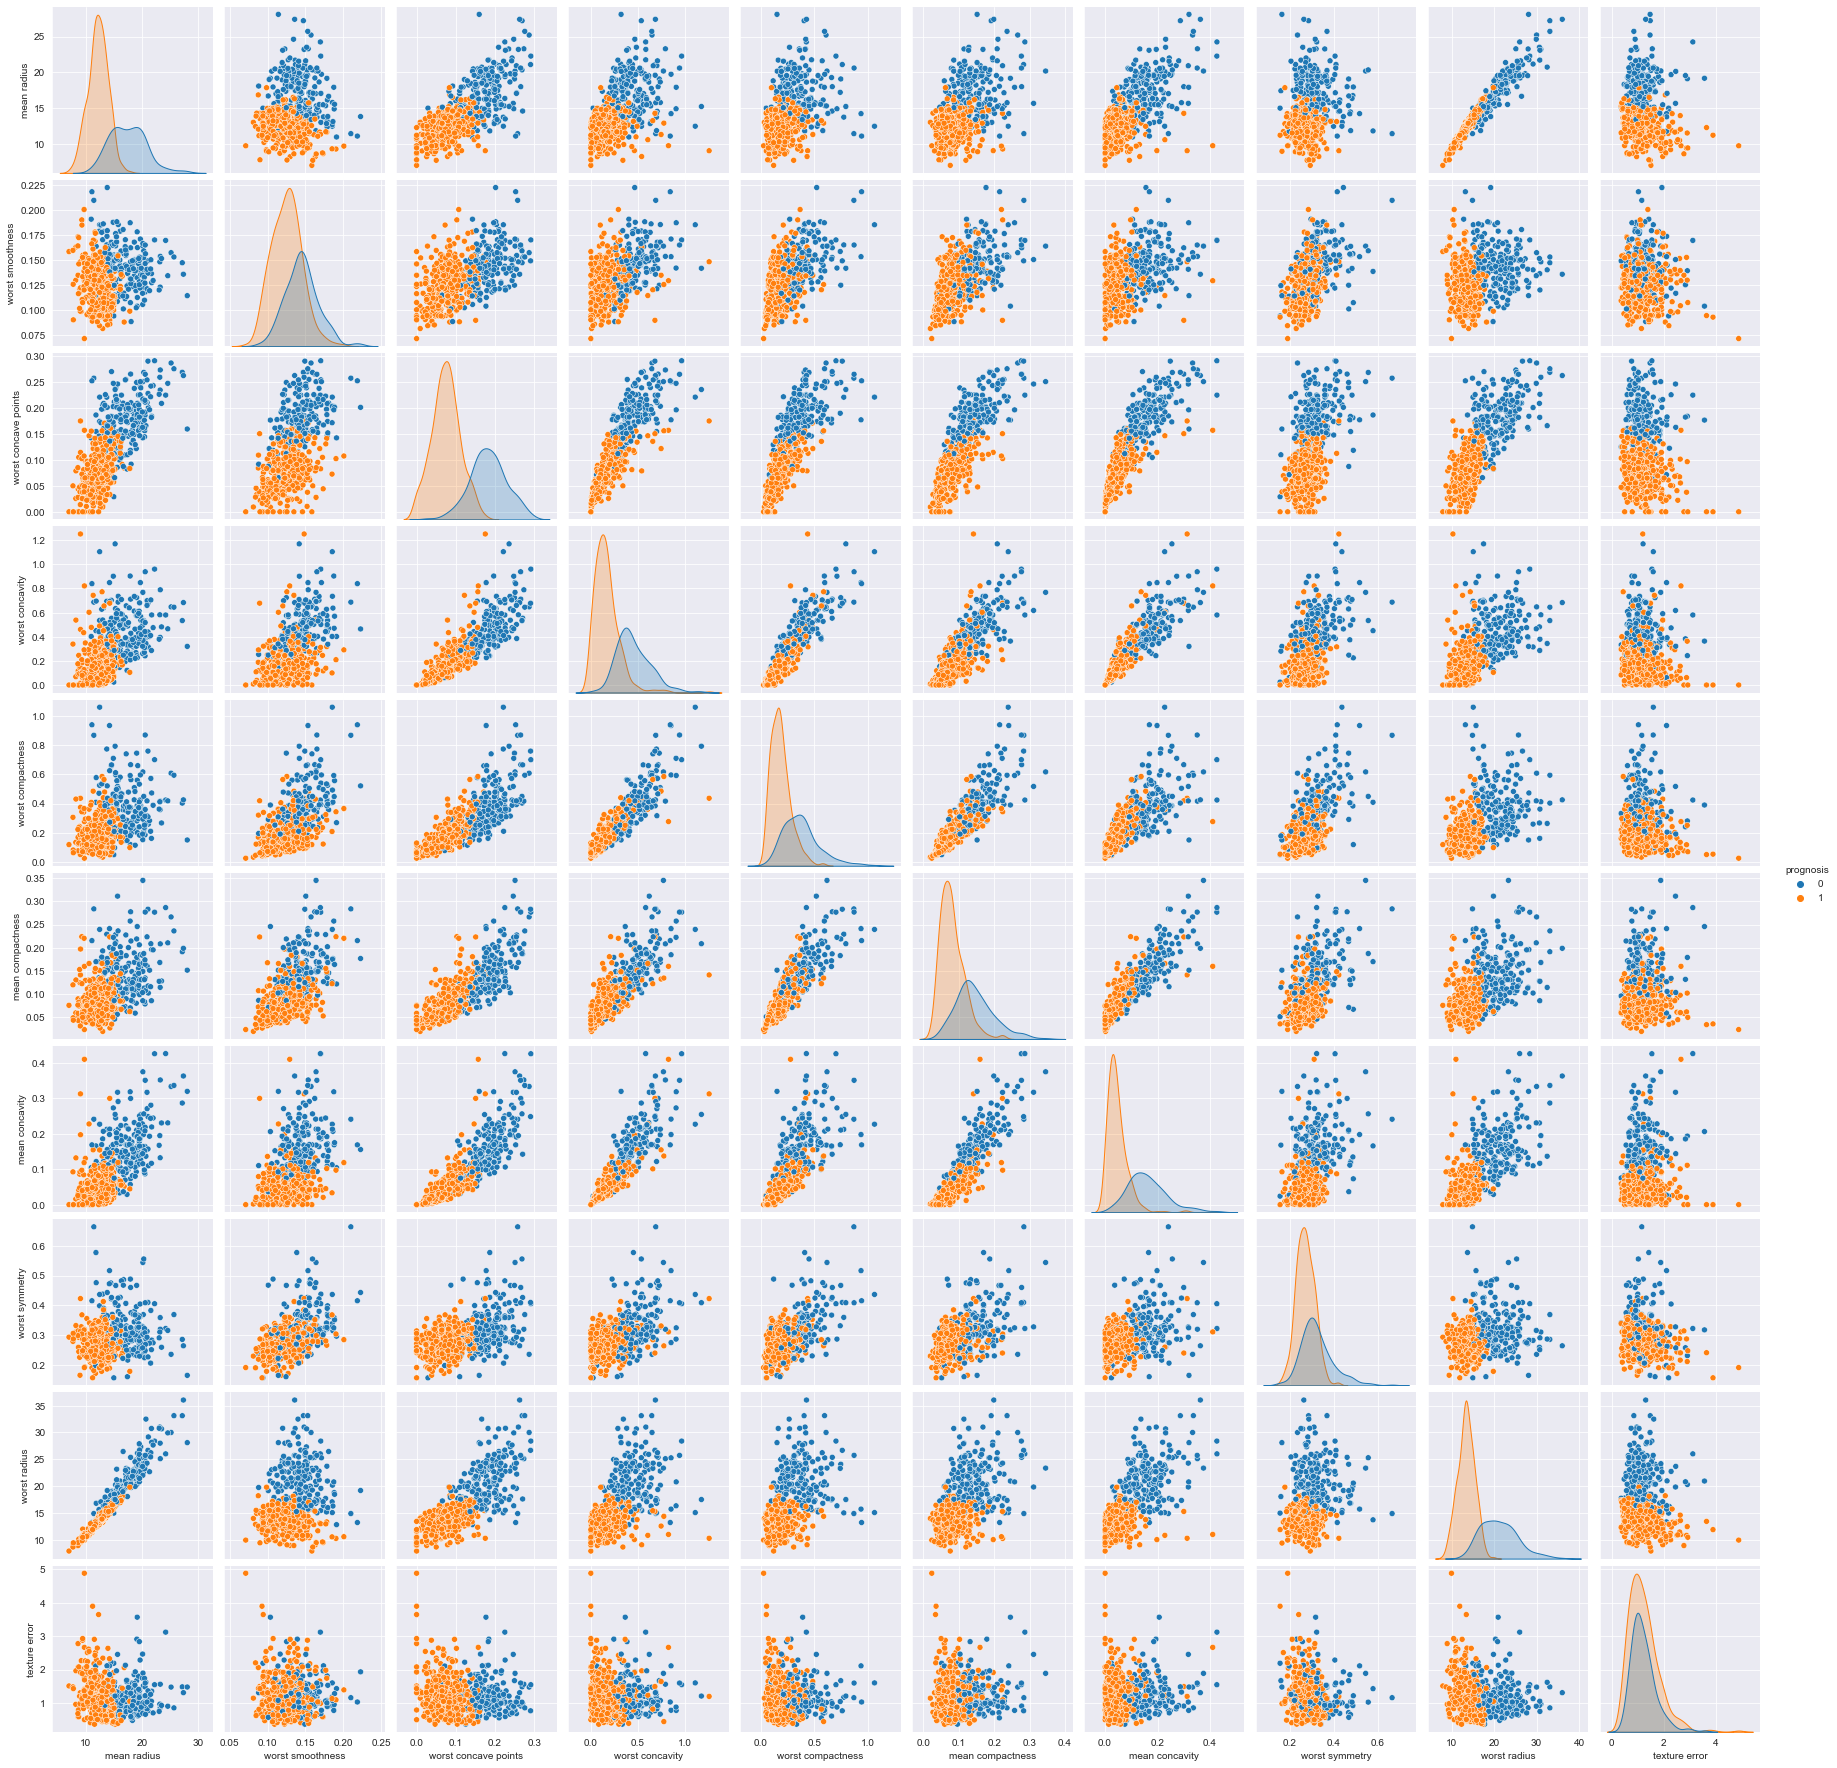

In [16]:
# Chart to verify dataset feature correlation with ten features - Scatter plot:
sns.pairplot(df[['mean radius', 'worst smoothness', 'worst concave points', 'worst concavity', 
                'worst compactness', 'mean compactness', 'mean concavity', 'worst symmetry', 
                'worst radius', 'texture error','prognosis']],hue='prognosis', height = 2.5);

### 4. Data Pre-Processing

#### 4.1 Missing value treatment

In [17]:
# Creating a data frame to check missing values:
chk_missing = df.iloc[:,0:-1]
chk_missing.replace(0, np.nan, inplace=True)

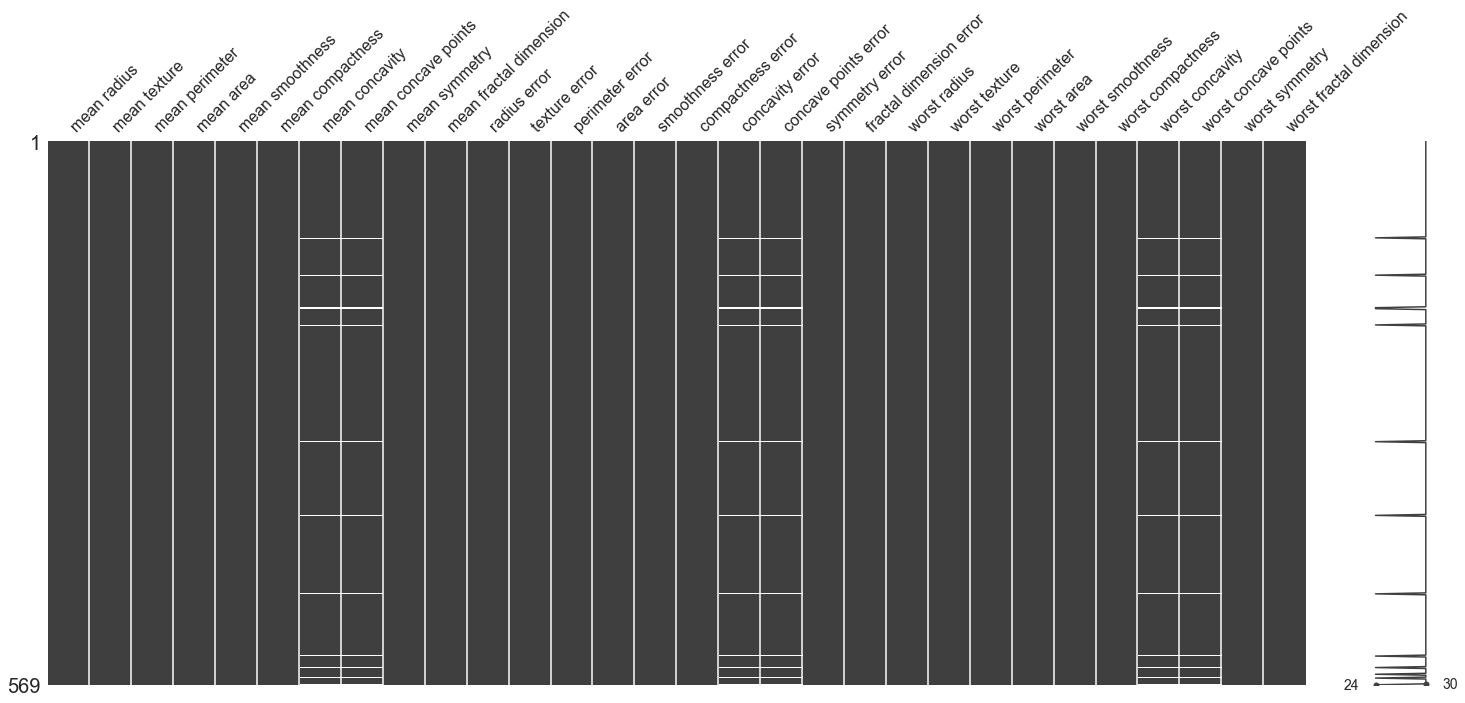

In [18]:
# Missing data visualization:
ms.matrix(chk_missing);

Before RFE results, let's create a new data frame with ten first features most influential.

In [19]:
# New data frame:
df = df.loc[:,['mean radius', 'worst smoothness', 'worst concave points', 'worst concavity', 
                'worst compactness', 'mean compactness', 'mean concavity', 'worst symmetry', 
                'worst radius', 'texture error','prognosis']]

There are now three features with **missing values** in the data frame: **worst concave points, worst concavity and mean concavity**. For these features, we will replace missing values with the median of the data column. 

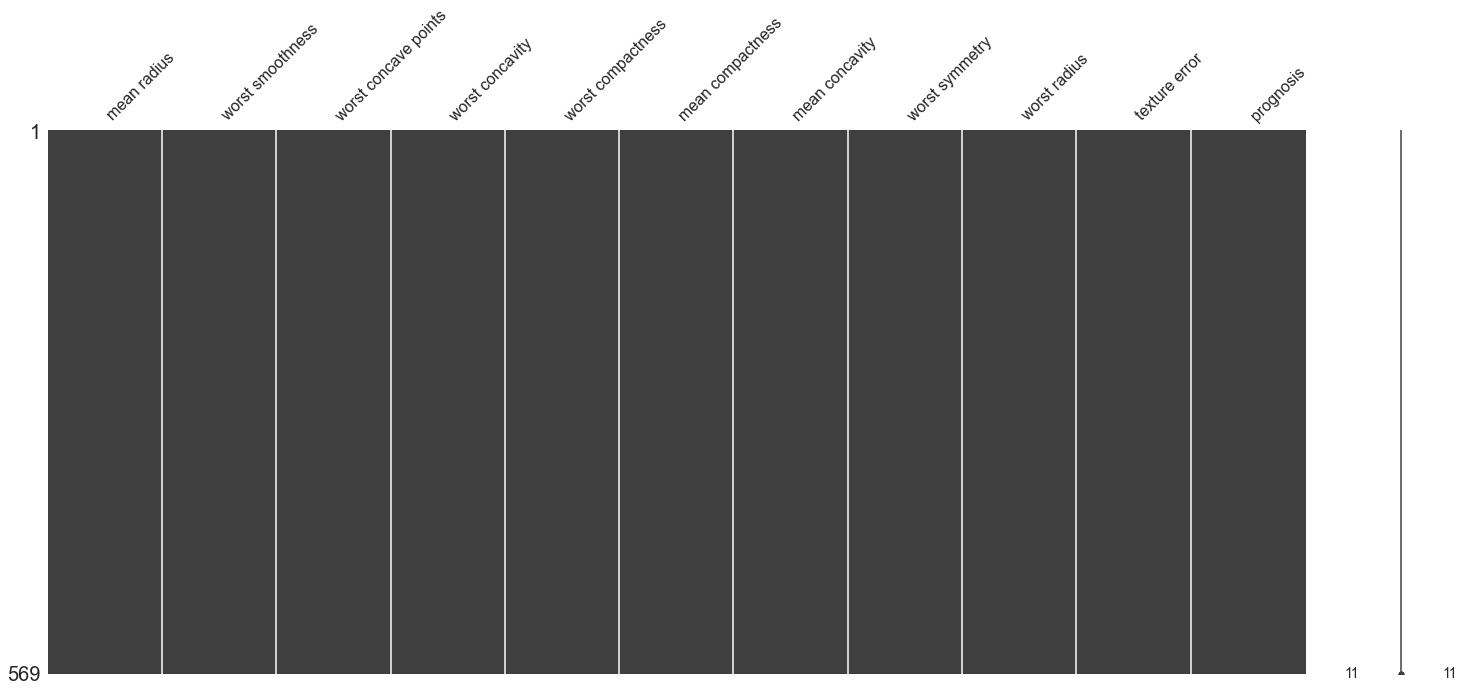

In [20]:
# Replace NaN with the median of the data column:
df['worst concave points'].fillna(df['worst concave points'].median(), inplace=True)
df['worst concavity'].fillna(df['worst concavity'].median(), inplace=True)
df['mean concavity'].fillna(df['mean concavity'].median(), inplace=True)

# Checking missing values in the new data frame:
ms.matrix(df);

#### 4.2 Train and Test data split

In [21]:
# Split data in train and test again, with the new data frame
array = df.values
X = array[:,0:10].astype(float) # all columns except class (prognosis)
Y = array[:,10] # only class column (prognosis)
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=test_size, random_state=seed)

### 5. Classification Models

Initially, let's define a number of folds for cross-validation and the metric for model evaluation: accuracy.

In [22]:
# Setting parameters:
num_folds = 10 # define folds to cross validation
scoring = 'accuracy'
np.random.seed(7) # setting a seed

Let's evaluate the performance of the following models:
- Logistic Regression
- KNN
- Decision Tree
- Naive Bayes
- Support Vector Machine

In [23]:
# Models building:
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [24]:
# Models evaluation:
results = []
names = []
results_mean = []
standard_deviation = []
for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  results_mean.append(cv_results.mean())
  standard_deviation.append(cv_results.std())

df_eval = pd.DataFrame(list(zip(results_mean, standard_deviation)), columns=['Accuracy mean', 'Standard deviation'], index=names)
df_eval.style.set_caption("Models Evaluation").highlight_max(color='lightgreen',subset='Accuracy mean')

,Accuracy mean,Standard deviation
LR,0.929710,0.033879
KNN,0.940773,0.036601
CART,0.912029,0.043207
NB,0.927440,0.028012
SVM,0.956184,0.025767


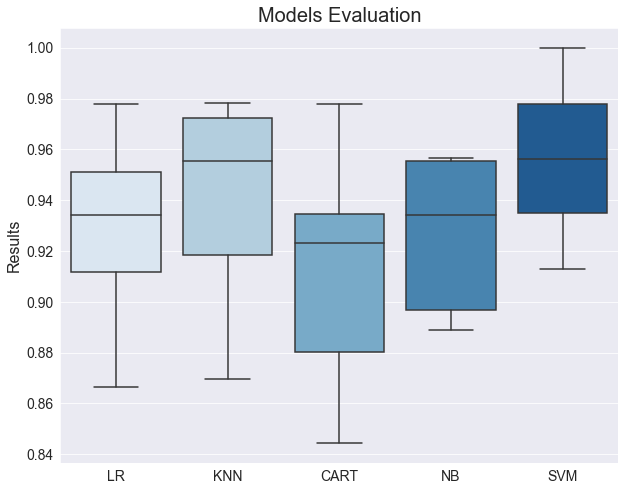

In [25]:
# Boxplot chart to compare models results:
df_results = pd.DataFrame(results).transpose()
df_results.columns = names

fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=df_results, palette='Blues')
plt.ylabel('Results', fontsize=16)
plt.title('Models Evaluation', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14);

For this settings of the dataset, SVM model presented the best performance. 

Let's check if results can be improved with standardized and normalized dataset:

In [26]:
# Models building and evaluation for dataset Standardized:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results_std = []
names_std = []
results_mean_std = []
standard_deviation_std = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results_std.append(cv_results)
  names_std.append(name)
  results_mean_std.append(cv_results.mean())
  standard_deviation_std.append(cv_results.std())

df_eval_std = pd.DataFrame(list(zip(results_mean_std, standard_deviation_std)), columns=['Accuracy mean', 'Standard deviation'], index=names_std)
df_eval.style.set_caption("Models Evaluation - Standardized Dataset").highlight_max(color='lightgreen',subset='Accuracy mean')

,Accuracy mean,Standard deviation
LR,0.929710,0.033879
KNN,0.940773,0.036601
CART,0.912029,0.043207
NB,0.927440,0.028012
SVM,0.956184,0.025767


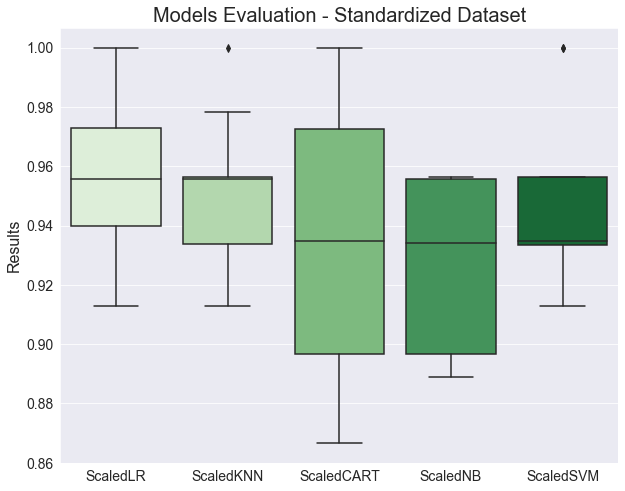

In [27]:
# Boxplot chart to compare model results for Standardized dataset:
df_results_std = pd.DataFrame(results_std).transpose()
df_results_std.columns = names_std

fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=df_results_std, palette='Greens')
plt.ylabel('Results', fontsize=16)
plt.title('Models Evaluation - Standardized Dataset', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14);

In [28]:
# Models building and evaluation for Normalised dataset:
pipelines = []
pipelines.append(('ScaledMinMaxLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledMinMaxKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledMinMaxCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledMinMaxNB', Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledMinMaxSVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
results_norm = []
names_norm = []
results_mean_norm = []
standard_deviation_norm = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results_norm.append(cv_results)
  names_norm.append(name)
  results_mean_norm.append(cv_results.mean())
  standard_deviation_norm.append(cv_results.std())

df_eval_norm = pd.DataFrame(list(zip(results_mean_norm, standard_deviation_norm)), columns=['Accuracy mean', 'Standard deviation'], index=names_norm)
df_eval_norm.style.set_caption("Models Evaluation - Normalized Dataset").highlight_max(color='lightgreen',subset='Accuracy mean')


,Accuracy mean,Standard deviation
ScaledMinMaxLR,0.947295,0.031212
ScaledMinMaxKNN,0.947246,0.020102
ScaledMinMaxCART,0.918696,0.029528
ScaledMinMaxNB,0.927440,0.028012
ScaledMinMaxSVM,0.942899,0.027877


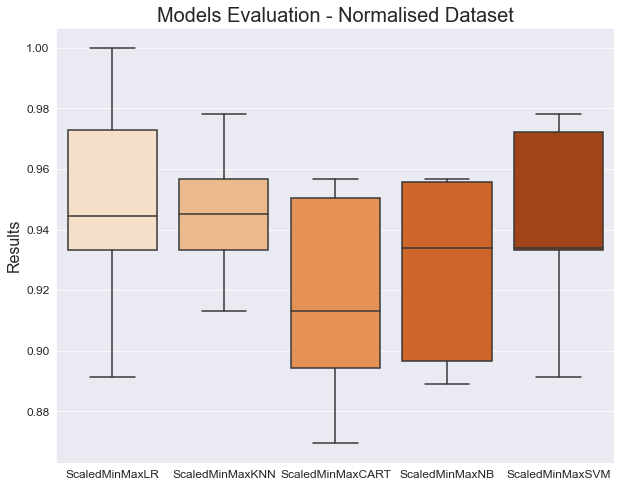

In [29]:
# Boxplot chart to compare model results for Normalised dataset:
df_results_norm = pd.DataFrame(results_norm).transpose()
df_results_norm.columns = names_norm

fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(data=df_results_norm, palette='Oranges')
plt.ylabel('Results', fontsize=16)
plt.title('Models Evaluation - Normalised Dataset', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12);

In [30]:
# Creating a table to compare three kinds of dataset processing and their models results, sorting by accuracy mean, from higher to lower:
df_rating = pd.concat([df_eval,df_eval_std, df_eval_norm])
df_rating.sort_values('Accuracy mean', ascending=False).style.set_caption(
    "Models Evaluation - All Datasets").background_gradient(cmap='Greens')

,Accuracy mean,Standard deviation
ScaledLR,0.958261,0.026696
SVM,0.956184,0.025767
ScaledKNN,0.951691,0.023600
ScaledSVM,0.949469,0.027808
ScaledMinMaxLR,0.947295,0.031212
ScaledMinMaxKNN,0.947246,0.020102
ScaledMinMaxSVM,0.942899,0.027877
KNN,0.940773,0.036601
ScaledCART,0.931932,0.045749
LR,0.929710,0.033879


The results suggest that better model is ScaledLR, it means **Logistic Regression for Standardized dataset**, wich accuracy mean reaches **0.958261**

### 6. Model Result

To verify the model performance, let's test the model into test dataset.

In [31]:
# Model preparation:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression(solver='liblinear')
model.fit(rescaledX, Y_train);

Accuracy:

In [32]:
# Accuracy approximation in the test dataset:
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)

print("Test accuracy: %f" % accuracy_score(Y_test, predictions))

Test accuracy: 0.973684


Classification Report:

In [33]:
cr = classification_report(Y_test, predictions, output_dict=True)
df_cr = pd.DataFrame(cr).transpose()
df_cr.style.set_caption('Classification Report')

,precision,recall,f1-score,support
0.0,1.000000,0.925000,0.961039,40.000000
1.0,0.961039,1.000000,0.980132,74.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.980519,0.962500,0.970586,114.000000
weighted avg,0.974710,0.973684,0.973433,114.000000


Confusion Matrix:

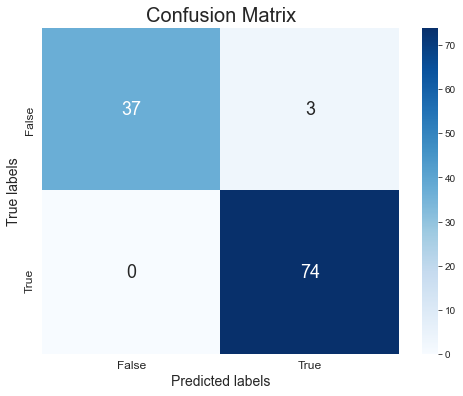

In [34]:
# Creating Confusion Matrix:
cm = confusion_matrix(Y_test, predictions)

fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False)

sns.heatmap(cm, annot=True, annot_kws={'fontsize':18}, ax=ax, cmap="Blues")

ax.set_xlabel('Predicted labels', fontsize=14)
ax.set_ylabel('True labels', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=20) 
ax.xaxis.set_ticklabels(['False', 'True'], fontsize=12)
ax.yaxis.set_ticklabels(['False', 'True'], fontsize=12)
plt.show()

The Confusion Matrix created has four different quadrants:

* True Negative (Top-Left Quadrant) = 37 occurencies
* False Positive (Top-Right Quadrant) = 3 occurencies
* False Negative (Bottom-Left Quadrant) = 0 occurencies
* True Positive (Bottom-Right Quadrant) = 74 occurencies
True means that the values were accurately predicted, False means that there was an error or wrong prediction.

We only have **3** errors compared to **111** correct predictions which, together with **0.973684** of accuracy, should be a good quantification of model quality.

### 7. Conclusion

So this is a use of machine learning for breast cancer prognosis prediction task. With this work we can answer the questions presented initially:  

1. Which features are more influential in prognosis?  
**mean radius, worst smoothness, worst concave points, worst concavity, worst compactness, mean compactness, mean concavity, worst symmetry, worst radius and texture error.**

2. Which machine learning model presents the highest accuracy in determining prognosis?  
**Logistic Regression for Standardized dataset.**

3. What is the value of this accuracy?  
**0.958261 (training accuracy)**

### 8. References

<https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29>  
<https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset>  
<https://thecleverprogrammer.com/2022/03/08/breast-cancer-survival-prediction-with-machine-learning/>
